<b>Ionosphere Data Set</b> 
(reference to UCI Machine Learning Repository <a href="https://archive.ics.uci.edu/ml/datasets/ionosphere">description</a>)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

from IPython.display import display

import numpy as np
np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('precision', 6)

import warnings
warnings.simplefilter("ignore")

import seaborn as sns
sns.set()

from outlierdetection import *

%load_ext watermark
%watermark -a "tb" -d -v -m -p sys,numpy,pandas,sklearn,torch,IPython

tb 2018-09-07 

CPython 3.6.4
IPython 6.2.1

sys 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy 1.14.2
pandas 0.22.0
sklearn 0.19.1
torch 0.4.0a0+9692519
IPython 6.2.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.5.0
machine    : x86_64
processor  : i386
CPU cores  : 24
interpreter: 64bit


In [2]:
# Seed random generators for repro 
SEED = 2017
np.random.seed(SEED)  

In [3]:
# load dataset https://archive.ics.uci.edu/ml/datasets/ionosphere
data = pd.read_csv("data/ionosphere.csv", header=None)
col_names = list(data.columns)
feature_names = list(col_names[:-1])
target_names = ['bad', 'good']

cols = list(data)
cols.insert(0, cols.pop(cols.index(34)))
data = data.loc[:, cols]
data.columns = col_names

feature_names, target_names

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 ['bad', 'good'])

In [4]:
# Check for NaNs and if scaling is required - look for categorial data that need transformation
display(data.head())
display(data.describe())

0   1   2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       23       24       25       26       27       28       29       30       31       32       33       34
0  g   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000  0.03760  0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223  0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487  0.18641 -0.45300
1  b   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000 -0.04549  0.50874 -0.67743  0.34432 -0.69707 -0.51685 -0.97515  0.05499 -0.62237  0.33109 -1.00000 -0.13151 -0.45300 -0.18056 -0.35734 -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288 -0.13738 -0.02447
2  g   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965  0.01198  0.73082  0.05346  0.85443  0.00827  0.54591  0.00299  0.83775 -0.13644  0.75535 -0.08540  0.70887 -0.27502  0.43385 -0.12062  0.57528 -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436 -0.24180  0.56045 -0.38238
3  b   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 -1.00000  0.14516  0.54094 -0.39330 -1.00000 -0.54467 -0.69975  1.00000  0.00000  0.00000  1.00000  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682  1.00000 -0.32382  1.00000
4  g   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152 -0.16399  0.52798 -0.20275  0.56409 -0.00712  0.34395 -0.27457  0.52940 -0.21780  0.45107 -0.17813  0.05982 -0.35575  0.02309 -0.52879  0.03286 -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707 -0.59573 -0.04608 -0.65697

1      2           3           4           5           6           7           8           9           10          11          12          13          14          15          16          17          18          19          20          21          22          23          24          25          26          27          28          29          30          31          32          33          34
count  351.000000  351.0  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000
mean     0.891738    0.0    0.641342    0.044372    0.601068    0.115889    0.550095    0.119360    0.511848    0.181345    0.476183    0.155040    0.400801    0.093414    0.344159    0.071132    0.381949   -0.003617    0.359390   -0.024025    0.336695    0.008296    0.362475   -0.057406    0.396135   -0.071187    0.541641   -0.069538    0.378445   -0.027907    0.352514   -0.003794    0.349364    0.014480
std      0.311155    0.0    0.497708    0.441435    0.519862    0.460810    0.492654    0.520750    0.507066    0.483851    0.563496    0.494817    0.622186    0.494873    0.652828    0.458371    0.618020    0.496762    0.626267    0.519076    0.609828    0.518166    0.603767    0.527456    0.578451    0.508495    0.516205    0.550025    0.575886    0.507974    0.571483    0.513574    0.522663    0.468337
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000
25%      1.000000    0.0    0.472135   -0.064735    0.412660   -0.024795    0.211310   -0.054840    0.087110   -0.048075    0.021120   -0.065265    0.000000   -0.073725    0.000000   -0.081705    0.000000   -0.225690    0.000000   -0.234670    0.000000   -0.243870    0.000000   -0.366885    0.000000   -0.332390    0.286435   -0.443165    0.000000   -0.236885    0.000000   -0.242595    0.000000   -0.165350
50%      1.000000    0.0    0.871110    0.016310    0.809200    0.022800    0.728730    0.014710    0.684210    0.018290    0.667980    0.028250    0.644070    0.030270    0.601940    0.000000    0.590910    0.000000    0.576190    0.000000    0.499090    0.000000    0.531760    0.000000    0.553890   -0.015050    0.708240   -0.017690    0.496640    0.000000    0.442770    0.000000    0.409560    0.000000
75%      1.000000    0.0    1.000000    0.194185    1.000000    0.334655    0.969240    0.445675    0.953240    0.534195    0.957895    0.482375    0.955505    0.374860    0.919330    0.308975    0.935705    0.195285    0.899265    0.134370    0.894865    0.188760    0.911235    0.164630    0.905240    0.156765    0.999945    0.153535    0.883465    0.154075    0.857620    0.200120    0.813765    0.171660
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [5]:
# check features and their individual distribution - watch for outliers
data.hist(figsize=(16,10));
plt.tight_layout()

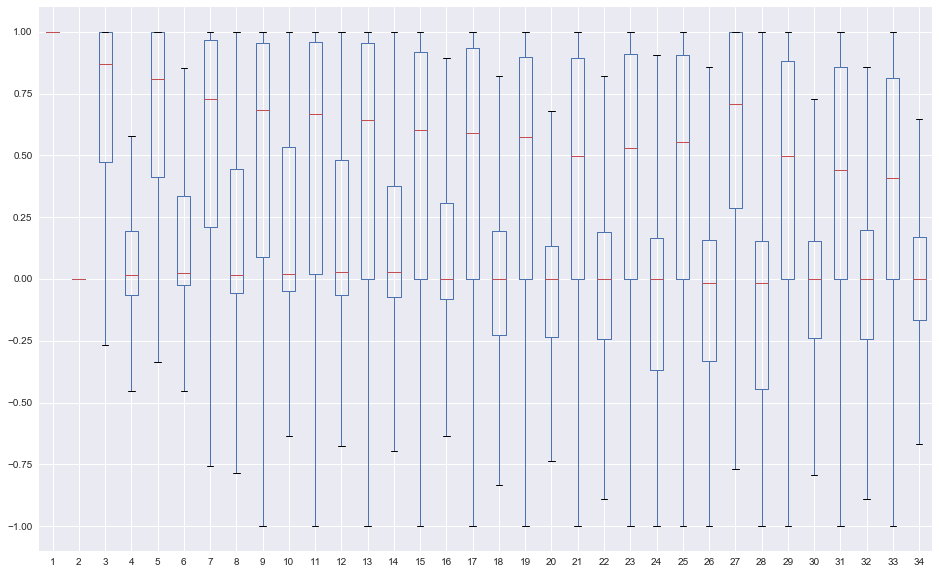

In [6]:
data.plot(kind= 'box' , sharex=False, sharey=False, grid=True, figsize=(16,10));

In [7]:
# Produce a scatter matrix for each pair of features in the data - plot provides insight about the data 
# distributon for the individual features
mx_plot = sns.pairplot(data, diag_kind="kde", hue = 0, palette = ('Red', '#875FDB'), 
             markers=["o", "D"], size=1.6)
_ = mx_plot.set(xticklabels=[])

In [8]:
# Correlation analysis - watch for uncorrelated features that don't contribute
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [9]:
#TSNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

tsne = TSNE(n_components=2, init='pca', random_state=0)
tsne_data_raw = tsne.fit_transform(np.float32(data.drop(0, axis=1).values))
labels_raw = np.int64(LabelEncoder().fit_transform(data[0]) )

#set up figure
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(tsne_data_raw[np.where(labels_raw==1),0],tsne_data_raw[np.where(labels_raw==1),1], 
           c='orange', label=target_names[1])
ax.scatter(tsne_data_raw[np.where(labels_raw==0),0],tsne_data_raw[np.where(labels_raw==0),1], 
           c='red', label=target_names[0])

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

fig.suptitle('TSNE Scatter Plot', fontsize=20, fontweight='bold')
_=plt.legend(loc=2, borderaxespad=.1, scatterpoints=1,bbox_to_anchor=(1.05, 1))

0
b    126
g    225
dtype: int64 ['bad', 'good']


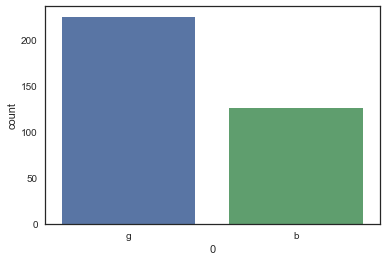

In [10]:
# check class distribution and if classes are balanced - Benign and Maglinant -  majority is Benign
print(data.groupby(0).size(), target_names)
sns.countplot(data[0])

In [11]:
# Check for null values 
for column in feature_names:
    print("%s %d" % (str(column).ljust(25), np.sum((data[column] == 0.0))))

0                         0
1                         38
2                         351
3                         25
4                         30
5                         38
6                         46
7                         37
8                         39
9                         32
10                        39
11                        28
12                        37
13                        31
14                        37
15                        39
16                        45
17                        25
18                        30
19                        24
20                        34
21                        36
22                        37
23                        27
24                        32
25                        24
26                        27
27                        0
28                        4
29                        30
30                        33
31                        31
32                        36
33                        48


In [12]:
# http://activisiongamescience.github.io/2015/12/23/Unsupervised-Anomaly-Detection-SOD-vs-One-class-SVM/
# Outlier detection - adjust threshold to select appropriate set
# set to -1 to pass-through

# remove the target class column from frame 
column_features = data.keys()[1:]

data_out = outlier_detection(data, column_features, threshold=3.5)

# Look at the outliers
display(
    data[~data.index.isin(data_out.index)].describe()
)

1     2          3          4          5          6          7          8          9          10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34
count  12.0  12.0  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000
mean    1.0   0.0   0.743555   0.040302   0.763630   0.063413   0.701160   0.144438   0.664892   0.037509   0.597735   0.048317   0.563277  -0.011136   0.584340  -0.024425   0.651974  -0.088303   0.710262  -0.061753   0.715161  -0.107262   0.757264  -0.041731   0.757297   0.000852   0.725474   0.053135   0.705751   0.074566   0.642346   0.078466   0.568048   0.057787
std     0.0   0.0   0.244772   0.142866   0.278038   0.235028   0.367526   0.298230   0.442879   0.254632   0.552049   0.174278   0.592933   0.157031   0.549498   0.220656   0.471007   0.263740   0.321776   0.265356   0.256437   0.251241   0.222114   0.168719   0.230885   0.110374   0.265551   0.125774   0.307583   0.198645   0.358039   0.240736   0.461318   0.286964
min     1.0   0.0   0.194660  -0.137680   0.041980  -0.147060  -0.105570  -0.055670  -0.320270  -0.183210  -0.682530  -0.140710  -0.842110  -0.489070  -0.828110  -0.305340  -0.470320  -0.717250  -0.047590  -0.860020   0.232920  -0.763160   0.286260  -0.521280   0.216450  -0.186450   0.039130  -0.090380  -0.038170  -0.172380  -0.167940  -0.107140  -0.301530  -0.335880
25%     1.0   0.0   0.664615  -0.014388   0.725753  -0.028490   0.635437  -0.034667   0.706915  -0.064677   0.643320  -0.051030   0.566152  -0.006223   0.543228  -0.077815   0.666662  -0.118328   0.719515  -0.058682   0.491873  -0.101057   0.674172  -0.067562   0.708890  -0.028280   0.703285  -0.032537   0.609170  -0.024348   0.495540  -0.048345   0.251908  -0.066882
50%     1.0   0.0   0.828810   0.002470   0.833985  -0.009945   0.866675  -0.006445   0.862835  -0.000815   0.801195   0.027055   0.821465   0.038805   0.805610  -0.029955   0.842705  -0.014925   0.796625   0.044365   0.842425  -0.006110   0.781825   0.009575   0.818025  -0.004335   0.789320   0.019585   0.805950   0.050145   0.729025   0.002035   0.821015   0.003185
75%     1.0   0.0   0.916312   0.063683   0.957382   0.019012   0.938727   0.184115   0.914783   0.023265   0.908240   0.080255   0.899445   0.068200   0.914445  -0.005770   0.941560   0.029312   0.936100   0.061180   0.893982   0.022922   0.923972   0.061712   0.940297   0.041365   0.899825   0.097133   0.923798   0.093297   0.928608   0.102930   0.907802   0.056880
max     1.0   0.0   0.980020   0.436170   1.000000   0.748040   0.989820   0.851060   0.955840   0.821390   0.977000   0.524080   0.978880   0.091600   0.991700   0.587430   1.000000   0.318310   0.966390   0.113390   0.977380   0.084120   1.000000   0.100870   0.953780   0.246920   0.967090   0.310920   1.000000   0.590710   0.981900   0.767640   0.972470   0.743560

In [13]:
#TSNE
from sklearn.manifold import TSNE

tsne =TSNE(n_components=2, init='pca', random_state=0)
tsne_data_raw = tsne.fit_transform(np.float32(data.drop(0, axis=1).values))
tsne_labels_raw = np.int64(LabelEncoder().fit_transform(data[0]) )

tsne_data_scale = tsne.fit_transform(tsne.fit_transform(np.float32(data_out.drop(0, axis=1).values)))
tsne_labels_scaled = np.int64(LabelEncoder().fit_transform(data_out[0]) )

tsne_label_names = target_names

#set up figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(4)

#Plot
ax1.scatter(tsne_data_raw[np.where(tsne_labels_raw==1),0],tsne_data_raw[np.where(tsne_labels_raw==1),1], 
            c='r', label=tsne_label_names[1])
ax1.scatter(tsne_data_raw[np.where(tsne_labels_raw==0),0],tsne_data_raw[np.where(tsne_labels_raw==0),1], 
            c='b', label=tsne_label_names[0])

ax2.scatter(tsne_data_scale[np.where(tsne_labels_scaled==1),0],tsne_data_scale[np.where(tsne_labels_scaled==1),1], 
            c='r', label=tsne_label_names[1])
ax2.scatter(tsne_data_scale[np.where(tsne_labels_scaled==0),0],tsne_data_scale[np.where(tsne_labels_scaled==0),1], 
            c='b', label=tsne_label_names[0])

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax2.axes.get_xaxis().set_ticks([])
ax2.axes.get_yaxis().set_ticks([])

fig.suptitle('TSNE Scatter Plot', fontsize=20, fontweight='bold')
plt.legend(loc=2, borderaxespad=.1, scatterpoints=1,bbox_to_anchor=(1.05, 1))

fig.text(.25,.05,'Raw Data', fontsize=15)
fig.text(.70,.05,'Outlier Removed Data', fontsize=15)

plt.show()